In [1]:
import numpy as np
import matplotlib.pyplot as plt

# for binary classification! no softmax here

def forward(X, W1, b1, W2, b2):
    # sigmoid
    # Z = 1 / (1 + np.exp( -(X.dot(W1) + b1) ))

    # tanh
    # Z = np.tanh(X.dot(W1) + b1)

    # relu
    Z = X.dot(W1) + b1
    Z = Z * (Z > 0)

    activation = Z.dot(W2) + b2
    Y = 1 / (1 + np.exp(-activation))
    return Y, Z


def predict(X, W1, b1, W2, b2):
    Y, _ = forward(X, W1, b1, W2, b2)
    return np.round(Y)


def derivative_w2(Z, T, Y):
    # Z is (N, M)
    return (T - Y).dot(Z)

def derivative_b2(T, Y):
    return (T - Y).sum()


def derivative_w1(X, Z, T, Y, W2):
    # dZ = np.outer(T-Y, W2) * Z * (1 - Z) # this is for sigmoid activation
    # dZ = np.outer(T-Y, W2) * (1 - Z * Z) # this is for tanh activation
    dZ = np.outer(T-Y, W2) * (Z > 0) # this is for relu activation
    return X.T.dot(dZ)


def derivative_b1(Z, T, Y, W2):
    # dZ = np.outer(T-Y, W2) * Z * (1 - Z) # this is for sigmoid activation
    # dZ = np.outer(T-Y, W2) * (1 - Z * Z) # this is for tanh activation
    dZ = np.outer(T-Y, W2) * (Z > 0) # this is for relu activation
    return dZ.sum(axis=0)


def get_log_likelihood(T, Y):
    return np.sum(T*np.log(Y) + (1-T)*np.log(1-Y))



def test_xor():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([0, 1, 1, 0])
    W1 = np.random.randn(2, 5)
    b1 = np.zeros(5)
    W2 = np.random.randn(5)
    b2 = 0
    LL = [] # keep track of log-likelihoods
    learning_rate = 1e-2
    regularization = 0.
    last_error_rate = None
    for i in range(30000):
        pY, Z = forward(X, W1, b1, W2, b2)
        ll = get_log_likelihood(Y, pY)
        prediction = predict(X, W1, b1, W2, b2)
        er = np.mean(prediction != Y)

        LL.append(ll)
        W2 += learning_rate * (derivative_w2(Z, Y, pY) - regularization * W2)
        b2 += learning_rate * (derivative_b2(Y, pY) - regularization * b2)
        W1 += learning_rate * (derivative_w1(X, Z, Y, pY, W2) - regularization * W1)
        b1 += learning_rate * (derivative_b1(Z, Y, pY, W2) - regularization * b1)
        if i % 1000 == 0:
            print(ll)

    print("final classification rate:", np.mean(prediction == Y))
    plt.plot(LL)
    plt.show()


def test_donut():
    # donut example
    N = 1000
    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*(N//2) + [1]*(N//2))

    n_hidden = 8
    W1 = np.random.randn(2, n_hidden)
    b1 = np.random.randn(n_hidden)
    W2 = np.random.randn(n_hidden)
    b2 = np.random.randn(1)
    LL = [] # keep track of log-likelihoods
    learning_rate = 0.00005
    regularization = 0.2
    last_error_rate = None
    for i in range(3000):
        pY, Z = forward(X, W1, b1, W2, b2)
        ll = get_log_likelihood(Y, pY)
        prediction = predict(X, W1, b1, W2, b2)
        er = np.abs(prediction - Y).mean()
        LL.append(ll)
        W2 += learning_rate * (derivative_w2(Z, Y, pY) - regularization * W2)
        b2 += learning_rate * (derivative_b2(Y, pY) - regularization * b2)
        W1 += learning_rate * (derivative_w1(X, Z, Y, pY, W2) - regularization * W1)
        b1 += learning_rate * (derivative_b1(Z, Y, pY, W2) - regularization * b1)
        if i % 300 == 0:
            print("i:", i, "ll:", ll, "classification rate:", 1 - er)
    plt.plot(LL)
    plt.show()


-3.1450385982
-0.19427322795
-0.0648627168207
-0.0354921499234
-0.023569007484
-0.0173144681977
-0.0135295789473
-0.0110211308713
-0.00924858984816
-0.00793666850621
-0.00692920088522
-0.00613501531585
-0.00549322459395
-0.0049654005316
-0.00452438969844
-0.00415058991564
-0.00382998366757
-0.00355258809214
-0.0033103348029
-0.00309706527427
-0.00290785147922
-0.0027391624067
-0.00258782138005
-0.00245128977743
-0.002327553324
-0.00221510855321
-0.00211224272574
-0.00201798264314
-0.00193128823623
-0.00185131605332
final classification rate: 1.0


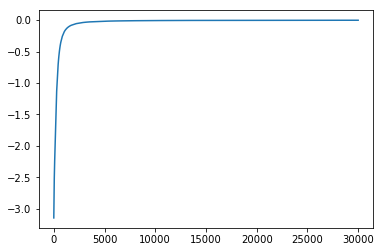

In [2]:
test_xor()

i: 0 ll: -6420.66083103 classification rate: 0.484
i: 300 ll: -319.468312818 classification rate: 0.924
i: 600 ll: -163.821024775 classification rate: 0.977
i: 900 ll: -95.8494507729 classification rate: 0.989
i: 1200 ll: -60.2313954527 classification rate: 0.991
i: 1500 ll: -48.6364365008 classification rate: 0.991
i: 1800 ll: -41.642730383 classification rate: 0.991
i: 2100 ll: -36.9266007619 classification rate: 0.992
i: 2400 ll: -32.9523578813 classification rate: 0.992
i: 2700 ll: -30.2742526492 classification rate: 0.994


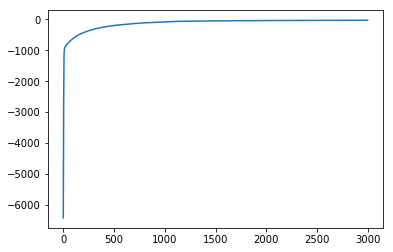

In [3]:
test_donut()